
### Generate two classes of data 

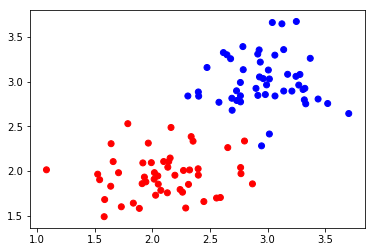

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

q1_K = 2
q1_means = [(2,2), (3,3)]
q1_sigs = [0.1, 0.1]
q1_N = [50,50]
q1_color = ['red','blue']

def make_points(means, sigs, n, K, colors):
    X = np.random.multivariate_normal(means[0],  [[sigs[0], 0], [0, sigs[0]]], 0)
    color_list = []
    
    for i in range(len(means)):
        mean = means[i]
        cov = [[sigs[i], 0], [0, sigs[i]]]
        X = np.concatenate((X, np.random.multivariate_normal(mean, cov, n[i])))
        color_list.extend([colors[i]]*len(X))
        
    # Index the points with T
    T = 0*np.ones(len(X))
    for pt in range(n[0]):
        T[pt] = 1
    T = T.astype(int)
        
    return X,T, color_list

X,T, colors = make_points(q1_means, q1_sigs, q1_N, q1_K, q1_color)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
plt.show()

### Use Gaussian Processes to Classify Clusters

In [5]:
def sig(x):
    return (1/(1+np.exp(-x)))

# get k(xn,xm) for each xn, xm array
def kernel_val(xn, xm, theta0, theta1, theta2, theta3):
    abs_term = sum(abs(xn-xm)**2)
    term = (theta0 * np.exp((-theta1/2) * abs_term)) + theta2 + (theta3 * np.dot(xn.T,xm))
    return term

# gets k matrix (reshaped) for each x_pt matrix, x[:y] matrix
def get_k(x, x_pt,theta0, theta1, theta2, theta3): 
    k_star = np.array([])
    for i in range(len(x)):
        k_star = np.append(k_star, kernel_val(x[i], x_pt, theta0, theta1, theta2, theta3))
    return k_star.reshape(len(x),1)

def get_c(x, vsig, theta0, theta1, theta2, theta3):
    clist = []
    for i in range(len(x)):
        for j in range(len(x)):
            term = kernel_val(x[i], x[j],theta0, theta1, theta2, theta3)
            if i==j:
                clist.append(term+ vsig) 
            else:
                clist.append(term)
    clist = np.array(clist)
    return clist.reshape(len(x), len(x))

# gets diagonal sig matrix or sig
def get_sigmat(a):
    sigs = np.array([])
    iden = np.identity(len(a))
    for i in range(len(a)):
        iden[i][i] = sig(a[i]) * (1- sig(a[i]))
        sigs = np.append(sigs,sig(a[i]))
    return iden, sigs

def get_a(n, c): 
    a = 0*np.ones(len(X))
    for i in range(n):
        term = inv(inv(c) + get_sigmat(a)[0])
        term2 = T - get_sigmat(a)[1] - np.dot(inv(c), a)
        a +=  np.dot(term, term2)
    return a

def get_prob(x, x_pt, vsig, theta0, theta1, theta2, theta3, A, C):
    K = get_k(X, x_pt,theta0, theta1, theta2, theta3)
    mu = np.dot(np.dot(K.T, inv(C)), A)
    cs = kernel_val(x_pt, x_pt, theta0, theta1, theta2, theta3)
    w = get_sigmat(A)[0]
    s = cs - np.dot(np.dot(K.T, inv(inv(w) + C)), K)
    term = mu/np.sqrt(1 + ((np.pi/8)*(s**2)))
    return sig(term)

### Draw the Probability Map

In [19]:
import time
from tqdm import trange
from time import sleep
start = time.time()

t0,t1,t2,t3 = 1,4,1,2
V = 1
N = len(X)
C = get_c(X, V, t0,t1,t2,t3)
A = get_a(10, C)
import math

prob_grid = []
for i in trange(50, desc='Loop 1', leave=True, position=0):
    x1_pt = 5 - i/10
    for j in range(50):
        x2_pt = j/10
        prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
        prob_grid.append(1-prob)
    sleep(0.01)

stop = time.time()
prob_grid = np.array(prob_grid).reshape(50,50)     
print(stop - start)

Loop 1: 100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.86it/s]


27.534879207611084


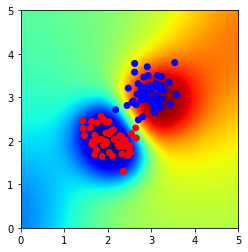

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors,)
plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")

### Using Different Kernel Parameters

In [8]:
start = time.time()

t0,t1,t2,t3 = 1,0.25,0,0
V = 1
N = len(X)
C = get_c(X, V, t0,t1,t2,t3)
A = get_a(10, C)

prob_grid = []
for i in trange(50, desc='Loop 1', leave=True, position=0):
    x1_pt = 5 - i/10
    for j in range(50):
        x2_pt = j/10
        prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
        prob_grid.append(1-prob)
    sleep(0.01)

stop = time.time()
prob_grid = np.array(prob_grid).reshape(50,50)     
print(stop - start)

Loop 1: 100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  1.88it/s]


18.13487720489502


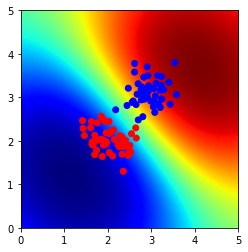

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors,)
plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")

### Further Analysis

#### Changing theta 1

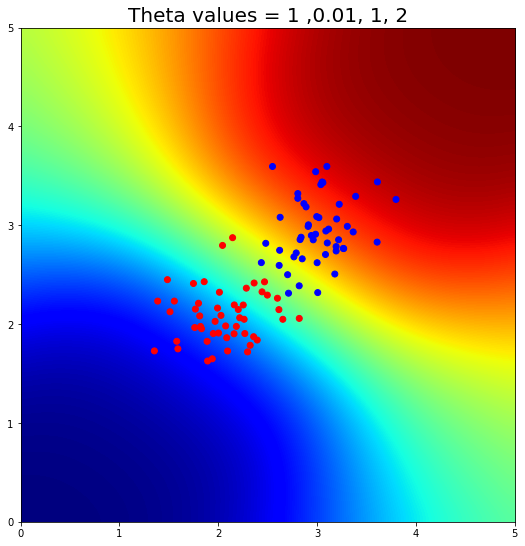

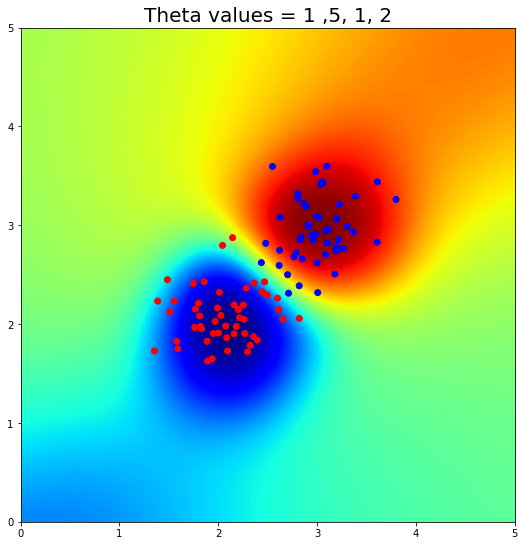

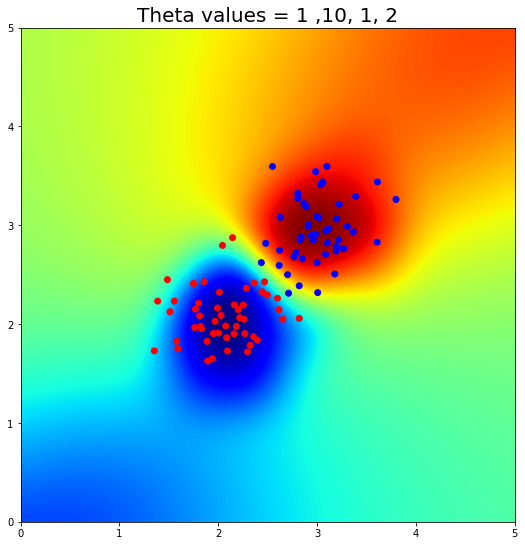

In [10]:

tlist = [0.01,5,10]
q6_K = 2
q6_means = [(2,2), (3,3)]
q6_sigs = [0.1,0.1]
q6_N = [50,50]
q6_color = ['red','blue']

X,T, colors = make_points(q6_means, q6_sigs, q6_N, q6_K, q6_color)
V = 1
N = len(X)

for l in range(len(tlist)):
    t0,t1,t2,t3 = 1,tlist[l],1,2
    C = get_c(X, V, t0,t1,t2,t3)
    A = get_a(10, C)
    prob_grid = []
    for i in range(50):
        x1_pt = 5 - i/10
        for j in range(50):
            x2_pt = j/10
            prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
            prob_grid.append(1-prob)
    prob_grid = np.array(prob_grid).reshape(50,50)     

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,l+1)
    plt.title("Theta values = {} ,{}, {}, {}".format(t0, t1, t2, t3), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
    plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")


In the next three plots, we see that as theta 2 increases, the overall probability values of belonging to either clusters become higher for each point, where there are less 'neutral', green, areas. As compared to the plot of theta2 = 0.01, the plot of theta2 = 5 and 10 has a larger dark blue and dark red area about the cluster means, and this follows for the light blue and light red areas surrounding it where previous neutral (probability of 0.5-ish) area are forced to become either more blue or more red. In other words, as theta 2 increase, there is a greater leniency for which area is considered to be part of that cluster, and the grid is minimizing the chance of any areas being truly 'neutral' between the two plots.

#### Changing theta 2

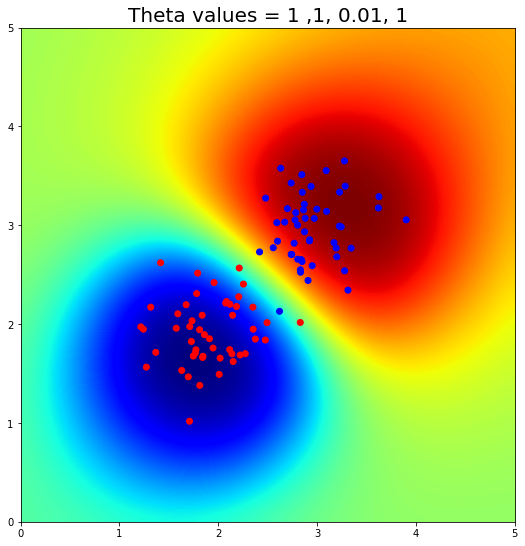

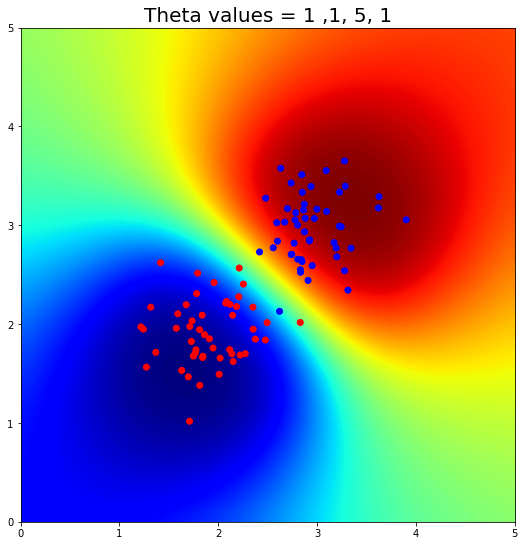

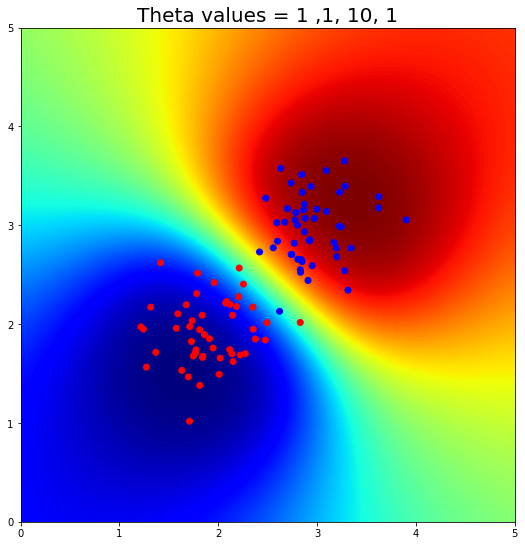

In [21]:
tlist = [0.01,5,10]
q6_K = 2
q6_means = [(2,2), (3,3)]
q6_sigs = [0.1,0.1]
q6_N = [50,50]
q6_color = ['red','blue']

X,T, colors = make_points(q6_means, q6_sigs, q6_N, q6_K, q6_color)
V = 1
N = len(X)

for l in range(len(tlist)):
    t0,t1,t2,t3 = 1,1,tlist[l],1
    C = get_c(X, V, t0,t1,t2,t3)
    A = get_a(10, C)
    prob_grid = []
    for i in range(50):
        x1_pt = 5 - i/10
        for j in range(50):
            x2_pt = j/10
            prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
            prob_grid.append(1-prob)
    prob_grid = np.array(prob_grid).reshape(50,50)     

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,l+1)
    plt.title("Theta values = {} ,{}, {}, {}".format(t0, t1, t2, t3), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
    plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")

            

#### Changing theta 3

As theta 3 increases, we see that the curvature of probability areas seem to get narrower, where the red and blue classification areas are curving in towards the cluster of points and are less spread out. In the graph of theta 3 = 0.01, the radial distance of blue areas around the cluster is somewhat oval, but as theta 3 increases, we see the 'oval' getting narrower, but with no change in the intensity of the color (value of probability), unlike the changes in theta 2. 

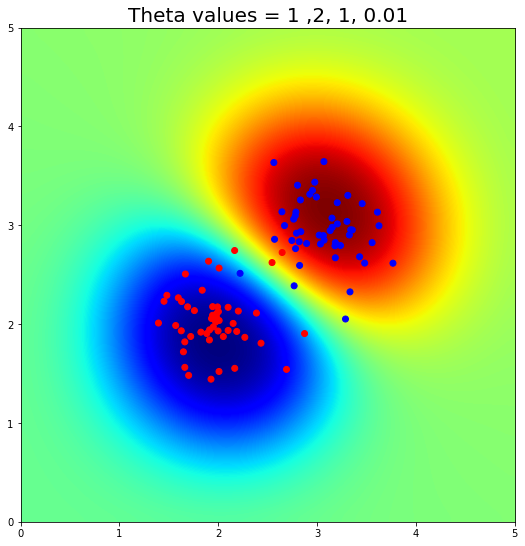

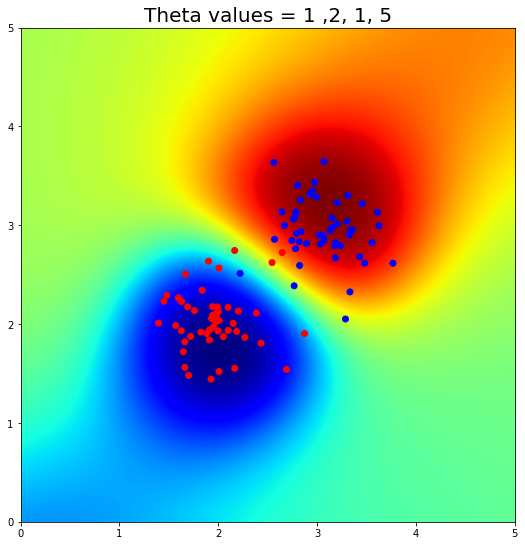

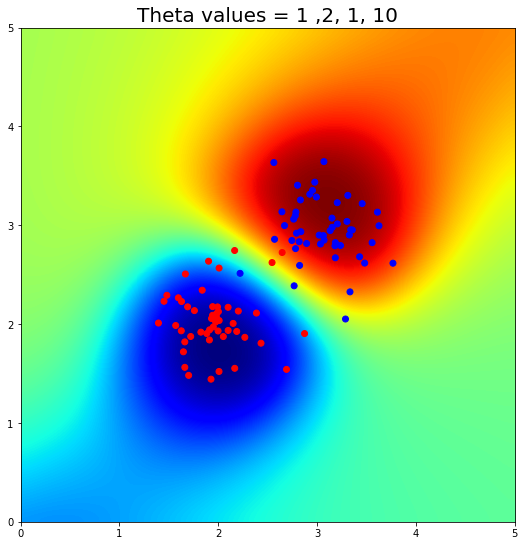

In [22]:
tlist = [0.01,5,10]
q6_K = 2
q6_means = [(2,2), (3,3)]
q6_sigs = [0.1,0.1]
q6_N = [50,50]
q6_color = ['red','blue']

X,T, colors = make_points(q6_means, q6_sigs, q6_N, q6_K, q6_color)
V = 1
N = len(X)

for l in range(len(tlist)):
    t0,t1,t2,t3 = 1,2,1,tlist[l]
    C = get_c(X, V, t0,t1,t2,t3)
    A = get_a(10, C)
    prob_grid = []
    for i in range(50):
        x1_pt = 5 - i/10
        for j in range(50):
            x2_pt = j/10
            prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
            prob_grid.append(1-prob)
    prob_grid = np.array(prob_grid).reshape(50,50)     

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,l+1)
    plt.title("Theta values = {} ,{}, {}, {}".format(t0, t1, t2, t3), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
    plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")
          

#### Overall change

Now examining all the effects together, we plot the graph over generally increasing theta 1, 2, and 3. 
As the theta values increase, we observe all of the signs we see in the previous plots, where firstly, the area with the highest probability (darkest blue area) is shifting towards the cluster mean. Secondly, the probability values for the respective blue and red clusters are larger (greater depth of color within the area of the clusters). Thirdly, the area where its more probable to find points in either cluster (in other words the red and blue areas) are more curved towards the points. All three effects combine to make the plots more precise with higher theta values since now the points have to be much closer to the centre to get a higher probability value, and there is less ambiguity. Overall, increasing theta will make the plotted curve more complex and hence more receptive to the position of points and the seperation of clusters.
This can all be proven by comparing the below plots to the controls at the top.

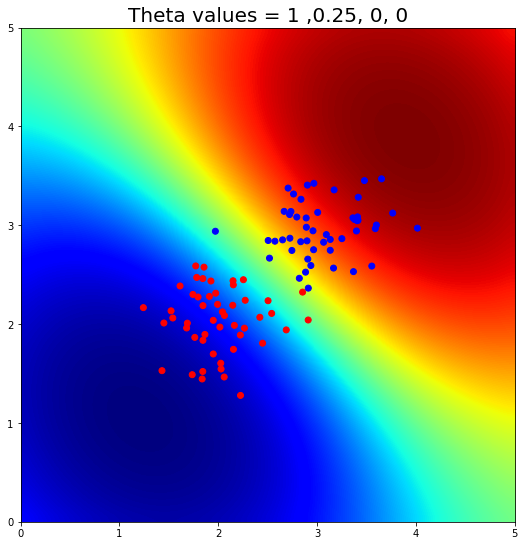

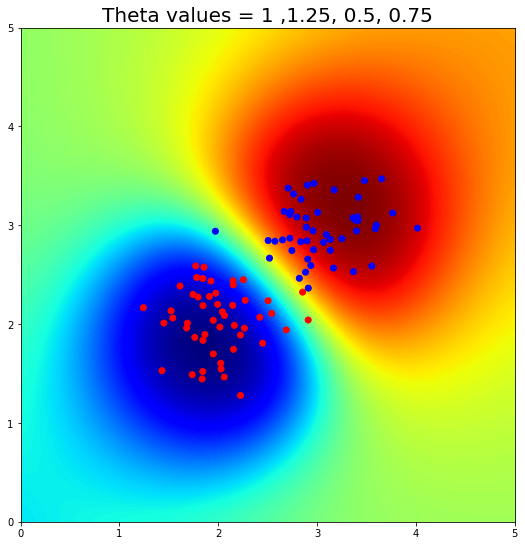

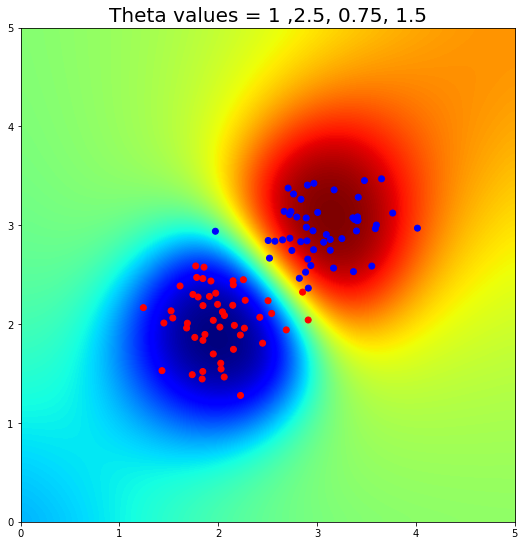

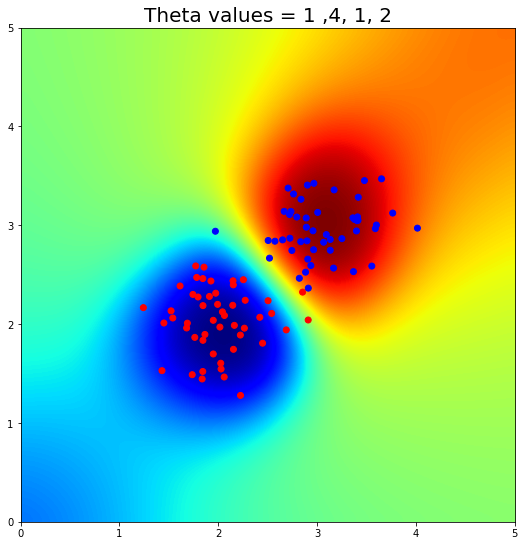

In [24]:
tlist = [[1,0.25,0,0],[1,1.25,0.5,0.75],[1,2.5,0.75,1.5],[1,4,1,2]]
q6_K = 2
q6_means = [(2,2), (3,3)]
q6_sigs = [0.1,0.1]
q6_N = [50,50]
q6_color = ['red','blue']

X,T, colors = make_points(q6_means, q6_sigs, q6_N, q6_K, q6_color)
V = 1
N = len(X)

for l in range(len(tlist)):
    t0,t1,t2,t3 = tlist[l]
    C = get_c(X, V, t0,t1,t2,t3)
    A = get_a(10, C)
    prob_grid = []
    for i in range(50):
        x1_pt = 5 - i/10
        for j in range(50):
            x2_pt = j/10
            prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
            prob_grid.append(1-prob)
    prob_grid = np.array(prob_grid).reshape(50,50)     

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,l+1)
    plt.title("Theta values = {} ,{}, {}, {}".format(t0, t1, t2, t3), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
    plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")
    

### Changing sigma

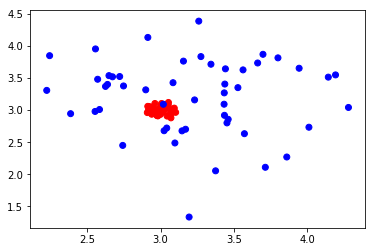

In [13]:
q2_K = 2
q2_means = [(3,3), (3.2,3.2)]
q2_sigs = [0.003, 0.3]
q2_N = [50,50]
q2_color = ['red','blue']
X,T, colors = make_points(q2_means, q2_sigs, q2_N, q2_K, q2_color)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
plt.show()

In [14]:
start = time.time()

t0,t1,t2,t3 = 1,4,1,2
V = 1
N = len(X)
C = get_c(X, V, t0,t1,t2,t3)
A = get_a(10, C)

prob_grid = []
for i in trange(50, desc='Loop 1', leave=True, position=0):
    x1_pt = 5 - i/10
    for j in range(50):
        x2_pt = j/10
        prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
        prob_grid.append(1-prob)
    sleep(0.01)

stop = time.time()
prob_grid = np.array(prob_grid).reshape(50,50)     
print(stop - start)

Loop 1: 100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.42it/s]


17.070271730422974


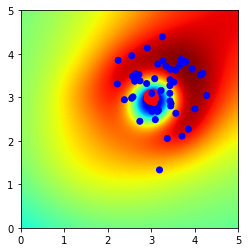

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors,)
plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")

### Outliers

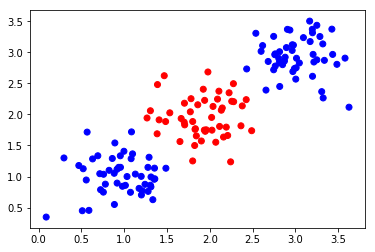

In [16]:
q2_K = 2
q2_means = [(2,2), (3,3),(1,1)]
q2_sigs = [0.1, 0.1, 0.1]
q2_N = [50,50,50]
q2_color = ['red','blue','blue']
X,T, colors = make_points(q2_means, q2_sigs, q2_N, q2_K, q2_color)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors)
plt.show()

In [17]:
start = time.time()

t0,t1,t2,t3 = 1,4,1,2
V = 1
N = len(X)
C = get_c(X, V, t0,t1,t2,t3)
A = get_a(10, C)

prob_grid = []
for i in trange(50, desc='Loop 1', leave=True, position=0):
    x1_pt = 5 - i/10
    for j in range(50):
        x2_pt = j/10
        prob = get_prob(X, np.array([x1_pt, x2_pt]), 1, t0,t1,t2,t3, A, C)[0][0]
        prob_grid.append(1-prob)
    sleep(0.01)

stop = time.time()
prob_grid = np.array(prob_grid).reshape(50,50)     
print(stop - start)

Loop 1: 100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.97it/s]


26.710617542266846


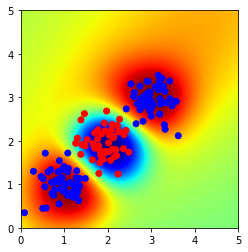

In [18]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors,)
plt.imshow(prob_grid, extent=[0,5,0,5], cmap='jet',interpolation="bicubic")